# Transformada Z

> Un problema común en el procesamiento de bioseñales es eliminar la interferencia de la red eléctrica (50/60 Hz) de, por ejemplo, señales EEG o ECG. Un filtro digital sencillo para eliminar la interferencia de 60 Hz (suponiendo una frecuencia de muestreo $f_s = 5000$ Hz) es ubicar ceros complejos conjugados en la frecuencia de la interferencia en el plano Z. En este caso, los ceros se ubican en $z_1 = e^{j2\pi \frac{60}{5000}}$ y $z_2 = e^{-j2\pi \frac{60}{5000}}$.

In [31]:
import sympy as sp

# 1. Configurar la impresión bonita de SymPy (opcional, pero recomendado)
# sp.init_printing(use_unicode=True)
# 2. Definir el símbolo 'z' para el polinomio
z = sp.symbols('z')


In [32]:
# 3. Definir las constantes del problema
f = 60      # Frecuencia de interferencia (Hz)
fs = 5000   # Frecuencia de muestreo (Hz)

# 4. Calcular la frecuencia angular normalizada (omega_0)
# w0 = 2 * pi * (f / fs)
# Usamos sp.pi para mantener la precisión simbólica
w0 = 2 * sp.pi * f / fs

In [33]:
print(f"--- Parámetros Iniciales ---")
print(f"Frecuencia (f): {f} Hz")
print(f"Frecuencia de Muestreo (fs): {fs} Hz")
print(f"Frecuencia Angular Normalizada (w0 = 2*pi*f/fs):")
sp.pprint(w0)



--- Parámetros Iniciales ---
Frecuencia (f): 60 Hz
Frecuencia de Muestreo (fs): 5000 Hz
Frecuencia Angular Normalizada (w0 = 2*pi*f/fs):
3⋅π
───
125


In [34]:
# 5. Definir los ceros z1 y z2
z1 = sp.exp(sp.I * w0)
z2 = sp.exp(-sp.I * w0)

print("--- Ceros Definidos ---")
print("z1:")
sp.pprint(z1)
print("\nz2:")
sp.pprint(z2)



--- Ceros Definidos ---
z1:
 3⋅ⅈ⋅π
 ─────
  125 
ℯ     

z2:
 -3⋅ⅈ⋅π 
 ───────
   125  
ℯ       


In [35]:

# 6. Crear la función de transferencia H(z) en forma factorizada
# H(z) = (z - z1) * (z - z2)
H_z = (z - z1) * (z - z2)

print("--- H(z) en Forma Factorizada ---")
sp.pprint(H_z)



--- H(z) en Forma Factorizada ---
⎛     -3⋅ⅈ⋅π ⎞ ⎛     3⋅ⅈ⋅π⎞
⎜     ───────⎟ ⎜     ─────⎟
⎜       125  ⎟ ⎜      125 ⎟
⎝z - ℯ       ⎠⋅⎝z - ℯ     ⎠


In [36]:

# 7. Expandir el polinomio
# SymPy realizará la multiplicación: z*z - z*z2 - z*z1 + z1*z2
H_z_expanded = sp.expand(H_z)

print("--- H(z) Expandido (sin simplificar) ---")
sp.pprint(H_z_expanded)



--- H(z) Expandido (sin simplificar) ---
        3⋅ⅈ⋅π      -3⋅ⅈ⋅π     
        ─────      ───────    
 2       125         125      
z  - z⋅ℯ      - z⋅ℯ        + 1


In [37]:

# 8. Simplificar la expresión expandida
# SymPy aplicará las identidades de Euler:
# z1 * z2 = exp(j*w0) * exp(-j*w0) = 1
# z1 + z2 = exp(j*w0) + exp(-j*w0) = 2*cos(w0)
# El resultado será: z**2 - z*(2*cos(w0)) + 1
H_z_simplified = sp.simplify(H_z_expanded)

print("--- H(z) Expandido y Simplificado ---")
sp.pprint(H_z_simplified)


# 9. Mostrar el valor numérico del coeficiente del coseno
print("--- Verificación de Coeficientes ---")
print("El polinomio resultante es de la forma: z**2 - 2*cos(w0)*z + 1")
coef_cos = 2 * sp.cos(w0)
print(f"Valor del coeficiente '2*cos(w0)':")
sp.pprint(coef_cos)
print(f"\nValor numérico (evaluado): {coef_cos.evalf()}")

--- H(z) Expandido y Simplificado ---
                       122      
                       ───      
 2       3/125         125      
z  - (-1)     ⋅z + (-1)   ⋅z + 1
--- Verificación de Coeficientes ---
El polinomio resultante es de la forma: z**2 - 2*cos(w0)*z + 1
Valor del coeficiente '2*cos(w0)':
     ⎛3⋅π⎞
2⋅cos⎜───⎟
     ⎝125⎠

Valor numérico (evaluado): 1.99431780052123


In [38]:
from scipy.signal import tf2zpk, freqz
import numpy as np
import matplotlib.pyplot as plt

a = np.array([1.0])
b = np.array([1, float(-coef_cos.evalf()), 1])

z, p, k = tf2zpk(b, a)

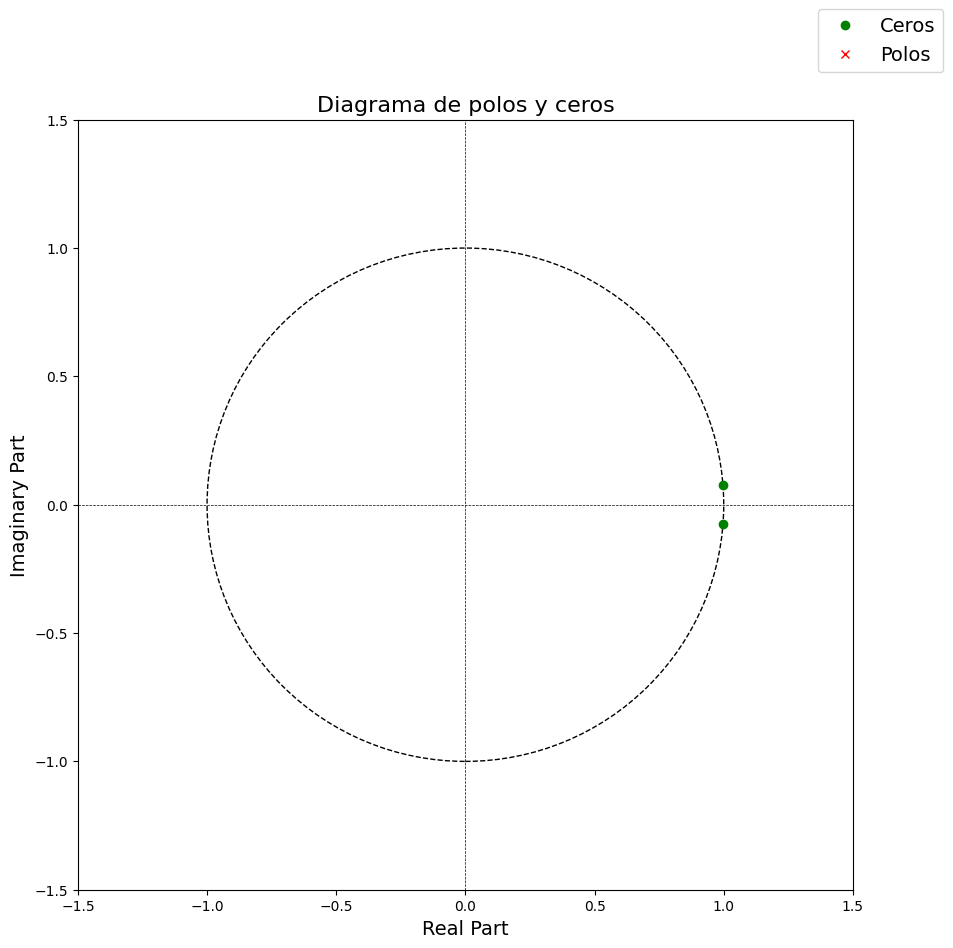

In [39]:
fig, ax = plt.subplots(figsize=(10, 10))
_ = ax.set_title('Diagrama de polos y ceros', fontsize=16)

# Círculo unitario
unit_circle = plt.Circle((0, 0), 1, color="black", fill=False, linestyle="dashed")
ax.add_artist(unit_circle)
ax.set_xlim((-1.5, 1.5))
ax.set_ylim((-1.5, 1.5))

ax.plot(np.real(z), np.imag(z), "go", label="Ceros")
ax.plot(np.real(p), np.imag(p), "rx", label="Polos")

ax.set_xlabel('Real Part', fontsize=14)
ax.set_ylabel('Imaginary Part', fontsize=14)
ax.axhline(0, color='black', lw=0.5, ls='--')
ax.axvline(0, color='black', lw=0.5, ls='--')

fig.legend(fontsize=14)
plt.show()

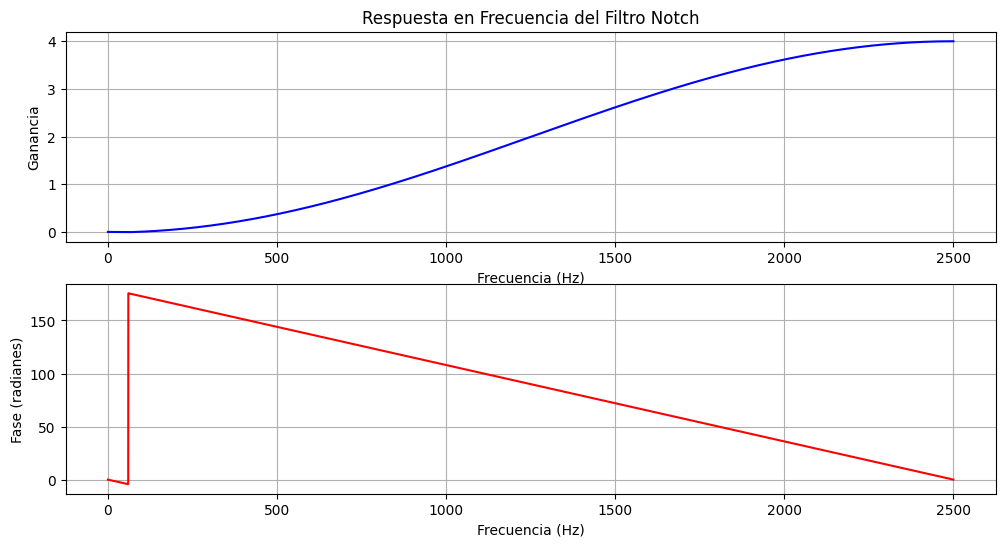

In [40]:
freqs, h = freqz(b, a, fs=fs, worN=8000)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(freqs, np.abs(h), 'b')
plt.title('Respuesta en Frecuencia del Filtro Notch')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia')
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(freqs, np.angle(h)*180/np.pi, 'r')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Fase (radianes)')
plt.grid()

In [41]:
def gaussian(x, mu, sigma, A):
    """
    Genera una función gaussiana.

    Parámetros:
    - x: array de tiempos
    - mu: posición central de la gaussiana
    - sigma: desviación estándar
    - A: amplitud
    """
    return A * np.exp(-((x - mu) ** 2) / (2 * sigma**2))

def simulate_ecg(duration=10.0, fs=500, heart_rate=70):
    """
    Simula un ECG sintético basado en la superposición de ondas gaussianas.

    Parámetros:
    - duration: duración de la señal en segundos
    - fs: frecuencia de muestreo en Hz
    - heart_rate: frecuencia cardiaca en latidos por minuto

    Devuelve:
    - t: vector de tiempos
    - ecg: señal simulada de ECG en mV
    """
    dt = 1 / fs
    t = np.arange(0, duration, dt)
    rr = 60 / heart_rate  # intervalo RR en segundos

    # Inicializar señal
    ecg = np.zeros_like(t)

    # Parámetros de las ondas (posiciones relativas en segundos)
    # P wave
    p_amp, p_dur, p_delay = 0.25, 0.09, 0.16
    # Q wave
    q_amp, q_dur, q_delay = -0.05, 0.066, 0.166
    # R wave
    r_amp, r_dur, r_delay = 1.6, 0.1, 0.166
    # S wave
    s_amp, s_dur, s_delay = -0.25, 0.066, 0.19
    # T wave
    t_amp, t_dur, t_delay = 0.35, 0.142, 0.36

    # Generar cada latido
    for beat_start in np.arange(0, duration, rr):
        mask = (t >= beat_start) & (t < beat_start + rr)
        tb = t[mask] - beat_start
        ecg[mask] += gaussian(tb, p_delay, p_dur / 2, p_amp)
        ecg[mask] += gaussian(tb, q_delay, q_dur / 2, q_amp)
        ecg[mask] += gaussian(tb, r_delay, r_dur / 2, r_amp)
        ecg[mask] += gaussian(tb, s_delay, s_dur / 2, s_amp)
        ecg[mask] += gaussian(tb, t_delay, t_dur / 2, t_amp)

    return t, ecg+0.1*np.cos(2*np.pi*60*t)

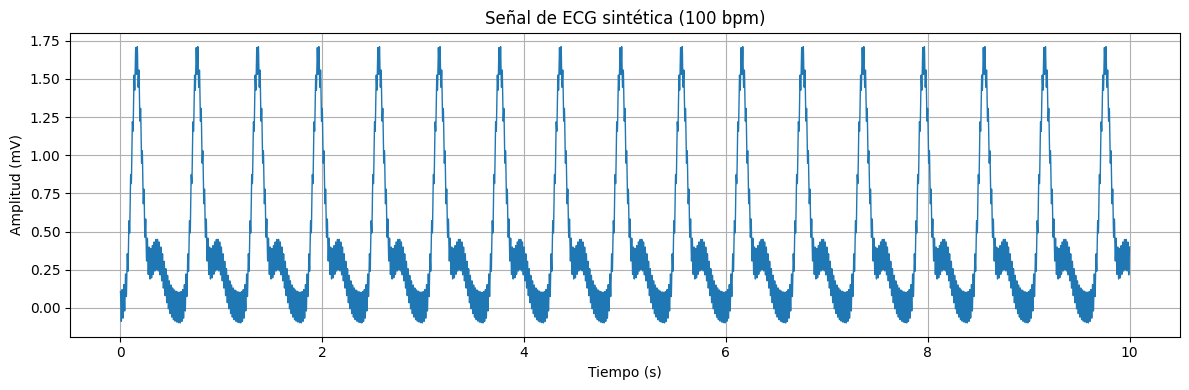

In [42]:
# Parámetros de simulación
DURATION = 10    # segundos
FS = 5000        # Hz
HR = 100          # latidos por minuto

# Generar señal
t, ecg_signal = simulate_ecg(duration=DURATION, fs=FS, heart_rate=HR)

# Graficar resultado
plt.figure(figsize=(12, 4))
plt.plot(t, ecg_signal, linewidth=1)
plt.title(f'Señal de ECG sintética ({HR} bpm)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.grid(True)
plt.tight_layout()
plt.show()

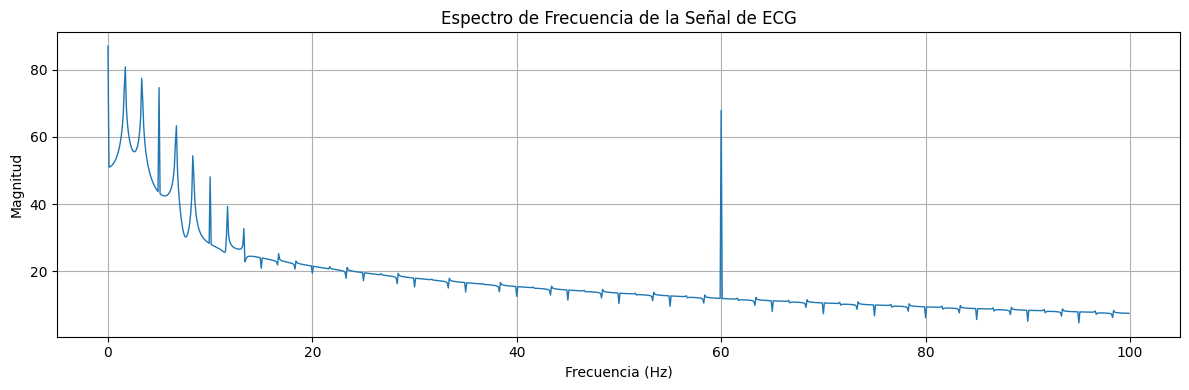

In [43]:
# Analisis Fourier de ECG -- Dominio de frecuencia
spectrum = 20*np.log10(np.abs(np.fft.fft(ecg_signal)))
freqs = np.fft.fftfreq(len(t), 1/FS)
n_freqs = 1000#len(freqs)//2
plt.figure(figsize=(12, 4))
plt.plot(freqs[:n_freqs], spectrum[:n_freqs], linewidth=1)
plt.title('Espectro de Frecuencia de la Señal de ECG')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.tight_layout()
plt.show()

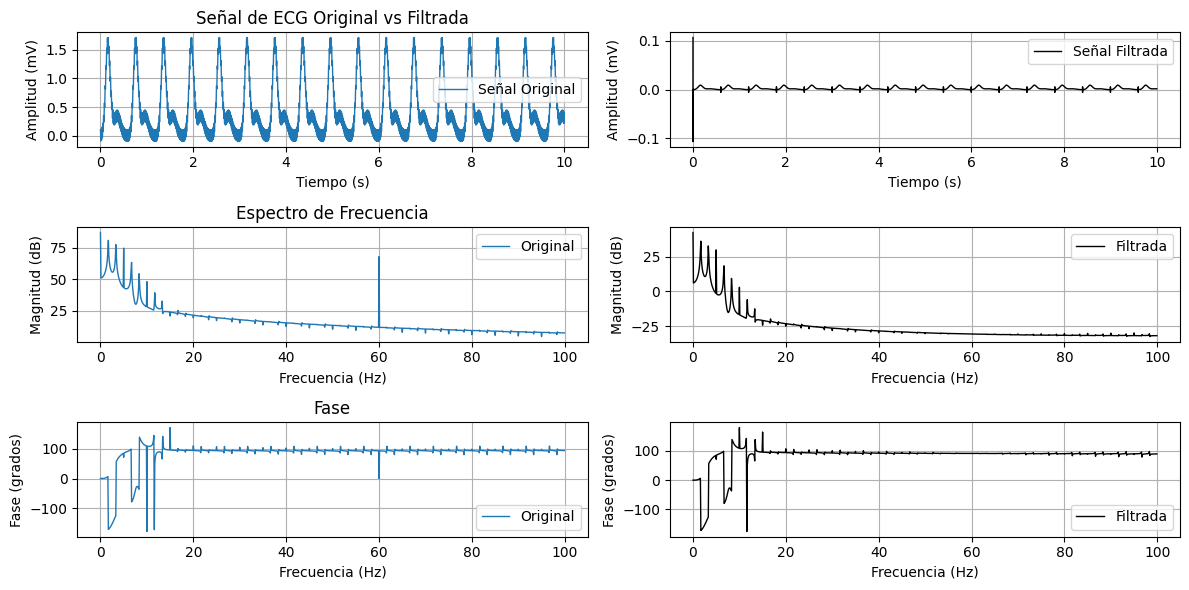

In [44]:
from scipy.signal import lfilter

# Filtrar la señal de ECG con el filtro Notch diseñado
filtered_ecg = lfilter(b, a, ecg_signal)

spectrum1 = 20*np.log10(np.abs(np.fft.fft(ecg_signal)))
spectrum3 = np.angle(np.fft.fft(ecg_signal))*180/np.pi
freqs = np.fft.fftfreq(len(t), 1/FS)
n_freqs = 1000#len(freqs)//2

spectrum2 = 20*np.log10(np.abs(np.fft.fft(filtered_ecg)))
spectrum4 = np.angle(np.fft.fft(filtered_ecg))*180/np.pi

# Graficar señal original y filtrada
plt.figure(figsize=(12, 6))
plt.subplot(3, 2, 1)
plt.plot(t, ecg_signal, label='Señal Original', linewidth=1)
plt.title('Señal de ECG Original vs Filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.legend()
plt.grid(True)
plt.subplot(3, 2, 2)
plt.plot(t, filtered_ecg, label='Señal Filtrada', color='black', linewidth=1)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 3)
plt.plot(freqs[:n_freqs], spectrum1[:n_freqs], label='Original', linewidth=1)
plt.title('Espectro de Frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(freqs[:n_freqs], spectrum2[:n_freqs], label='Filtrada', color='black', linewidth=1)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 5)
plt.plot(freqs[:n_freqs], spectrum3[:n_freqs], label='Original', linewidth=1)
plt.title('Fase')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Fase (grados)')
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 6)
plt.plot(freqs[:n_freqs], spectrum4[:n_freqs], label='Filtrada', color='black', linewidth=1)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Fase (grados)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()